In [26]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
from moneyball import  places, find_position, on_base_percentage
%matplotlib inline

In [27]:
!head data/baseballdatabank-master/core/Batting.csv

In [28]:
batting_stats = pd.read_csv('data/baseballdatabank-master/core/Batting.csv')

In [44]:
columns = ['playerID', 'yearID', 'stint', 'teamID', 'lgID', 'G', 'AB', 'H', 'BB', 'HBP', 'SF']
batting = batting_stats[columns].copy()
batting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101332 entries, 0 to 101331
Data columns (total 11 columns):
playerID    101332 non-null object
yearID      101332 non-null int64
stint       101332 non-null int64
teamID      101332 non-null object
lgID        100595 non-null object
G           101332 non-null int64
AB          96183 non-null float64
H           96183 non-null float64
BB          96183 non-null float64
HBP         93373 non-null float64
SF          60151 non-null float64
dtypes: float64(5), int64(3), object(3)
memory usage: 8.5+ MB


In [30]:
salary = pd.read_csv('data/baseballdatabank-master/core/Salaries.csv')

In [31]:
salary.head()

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000


In [32]:
batting_salaries = pd.merge(batting, salary)

In [33]:
batting_salaries

,playerID,yearID,stint,teamID,lgID,G,AB,H,BB,HBP,SF,salary
0,ackerji01,1985,1,TOR,AL,61,NaN,NaN,NaN,NaN,NaN,170000
1,agostju01,1985,1,CHA,AL,54,0.0,0.0,0.0,0.0,0.0,147500
2,aguaylu01,1985,1,PHI,NL,91,165.0,46.0,22.0,6.0,3.0,237000
3,alexado01,1985,1,TOR,AL,36,NaN,NaN,NaN,NaN,NaN,875000
4,allenne01,1985,1,SLN,NL,23,2.0,0.0,0.0,0.0,0.0,750000
5,almonbi01,1985,1,PIT,NL,88,244.0,66.0,22.0,1.0,3.0,255000
6,anderla02,1985,1,PHI,NL,57,4.0,0.0,0.0,0.0,0.0,250500
7,andujjo01,1985,1,SLN,NL,38,94.0,10.0,5.0,0.0,0.0,1030000
8,armasto01,1985,1,BOS,AL,103,385.0,102.0,18.0,2.0,5.0,915000
9,ashbyal01,1985,1,HOU,NL,65,189.0,53.0,24.0,1.0,1.0,416667


### On Base Percentage
![On Base Percentage](https://upload.wikimedia.org/math/5/6/e/56e63a7b1b0724813e09ba0ab1160a22.png)

obp = (hits + walks + hit_by_pitch) / (at_bats + walks + hit_by_pitch + sacrifice_flies)

In [34]:
appearances = pd.read_csv('data/baseballdatabank-master/core/Appearances.csv')

In [35]:
positions = pd.Series(find_position(places))
appearances = appearances[['yearID', 'teamID', 'playerID']].copy()
appearances['position'] = positions

In [36]:
appearances.tail()

,yearID,teamID,playerID,position
100946,2015,OAK,zitoba01,pitcher
100947,2015,KCA,zobribe01,second_base
100948,2015,OAK,zobribe01,second_base
100949,2015,SEA,zuninmi01,catcher
100950,2015,SEA,zychto01,pitcher


In [37]:
batting_salaries_by_position = pd.merge(batting_salaries, appearances)

In [38]:
batting_salaries_by_position = batting_salaries_by_position.fillna(0.0)

In [39]:
batting_salaries_by_position['OBP'] = on_base_percentage(batting_salaries_by_position.pop('H'),
                                                         batting_salaries_by_position.pop('BB'),
                                                         batting_salaries_by_position.pop('HBP'),
                                                         batting_salaries_by_position.pop('AB'),
                                                         batting_salaries_by_position.pop('SF')) 

In [53]:
#yearly_data = batting_salaries_by_position.groupby(['yearID', 'playerID'])
#yearly_data.groups

In [54]:
# salary_stdev = []
# obp_stdev = []
# for row in batting_salaries_by_position.itertuples:
    

{(1992, 'sveumda01'): [5259],
 (2012, 'bucktr01'): [21455],
 (2002, 'ponsosi01'): [13970],
 (2015, 'howeljp01'): [24044],
 (1987, 'brookhu01'): [1302],
 (1997, 'hudlere01'): [9338],
 (2009, 'frankry01'): [19238],
 (1991, 'swiftbi02'): [4542],
 (1998, 'giambja01'): [10146],
 (1994, 'snowjt01'): [6964],
 (2012, 'bayja01'): [21409],
 (1995, 'sweenmi01'): [7936],
 (2014, 'gonzaca01'): [23196],
 (2009, 'pavanca01'): [19549],
 (2004, 'ayalalu01'): [15033],
 (2015, 'ruggiju01'): [24350],
 (1992, 'taubeed01'): [5268],
 (1994, 'russeje01'): [6914],
 (2006, 'weaveje01'): [17340],
 (2014, 'encared01'): [23137],
 (1996, 'willimi03'): [8946],
 (2004, 'brunter01'): [15085],
 (1988, 'lowrydw01'): [2173],
 (1996, 'moranmi01'): [8613],
 (2002, 'gomezch02'): [13652],
 (1990, 'robinje02'): [3768],
 (2014, 'harrijo05'): [23234],
 (1998, 'redmomi01'): [10568],
 (1989, 'alexado01'): [2487],
 (2004, 'radkebr01'): [15598],
 (2001, 'biddlro01'): [12653],
 (1985, 'cowlejo01'): [100],
 (2009, 'burtoja01'): [1910

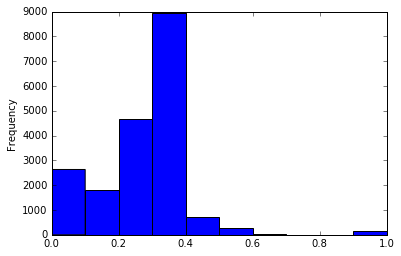

In [56]:
batting_salaries_by_position['OBP'].plot.hist()